In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
irr_df = pd.read_csv('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/iradiance_hyspec.csv')

In [4]:
irr_df.head()

,wavelength,Irradiance,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,199.12,7.38,NaN,NaN,NaN
1,199.48,7.50,NaN,NaN,NaN
2,199.84,7.68,NaN,NaN,NaN
3,200.20,7.79,NaN,NaN,NaN
4,200.56,7.93,NaN,NaN,NaN


Text(0, 0.5, 'Irradiance')

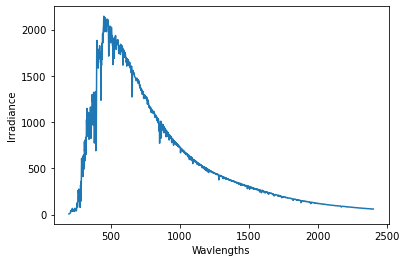

In [77]:
plt.plot(irr_df['wavelength'], irr_df['Irradiance']) # plot hypsec irradaince spectra
plt.xlabel('Wavlengths')
plt.ylabel('Irradiance')
#plt.xlim(540, 600)

In [6]:
# now plot Py6S spectra
py6s_wave_df = pd.read_excel('/Users/jameswallace/Desktop/Project/FENIX_Bands.xlsx', index_col=0)
py6s_df = pd.read_csv('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/py6s_generate_irradiance/17_06_2021_13:18_irradiance.csv', index_col= 0)

In [7]:
py6s_df.head()

,0
0,663.449
1,704.679
2,570.117
3,644.839
4,720.465


In [8]:
py6s_wave_df.head()

,Wavelength,FWHM_2019,Unnamed: 3,Wavelength_2018,FWHM_2018,Unnamed: 6,Unnamed: 7
ID,,,,,,,
1,377.32,3.35,NaN,377.73,3.35,NaN,-0.41
2,380.67,3.35,NaN,381.09,3.35,NaN,-0.42
3,384.03,3.36,NaN,384.44,3.36,NaN,-0.41
4,387.39,3.36,NaN,387.80,3.36,NaN,-0.41
5,390.74,3.36,NaN,391.16,3.36,NaN,-0.42


(750.0, 775.0)

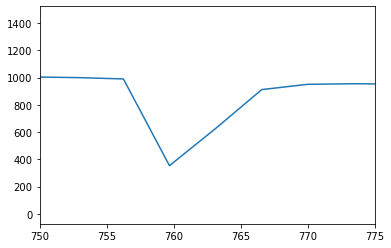

In [66]:
plt.plot(py6s_wave_df['Wavelength'], py6s_df['0'])
plt.xlim(750, 775)

In [10]:
irr_df

,wavelength,Irradiance,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,199.12,7.38,NaN,NaN,NaN
1,199.48,7.50,NaN,NaN,NaN
2,199.84,7.68,NaN,NaN,NaN
3,200.20,7.79,NaN,NaN,NaN
4,200.56,7.93,NaN,NaN,NaN
...,...,...,...,...,...
8208,2395.21,60.57,NaN,NaN,NaN
8209,2395.78,60.53,NaN,NaN,NaN
8210,2396.36,60.48,NaN,NaN,NaN
8211,2396.93,60.48,NaN,NaN,NaN


In [12]:
from FLD_methods import *

In [31]:
differences = []
for i in range(len(irr_df) - 1):
    diff = irr_df['wavelength'][i+1] - irr_df['wavelength'][i]
    round(diff, 2)
    differences.append(diff)
differences.append(differences[-1])

In [32]:
irr_df['fwhm'] = differences

Text(0, 0.5, 'FWHM')

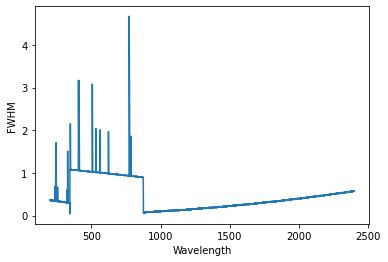

In [36]:
plt.plot(irr_df['wavelength'], irr_df['fwhm'])
plt.xlabel('Wavelength')
plt.ylabel('FWHM')

In [38]:
measured_wavelengths = np.asarray(py6s_wave_df['Wavelength']) # measured wavelengths
modelled_irr = np.asarray(irr_df['Irradiance']) # modelled irradiance at incorrect wavelengths
modelled_wave = np.asarray(irr_df['wavelength']) # wavelengths model was sampled over

In [39]:
# search for closet wavelengths with the find_nearest function and get the irradiance value
hack_irr = []
for i in range(len(measured_wavelengths)):
    irr_index = find_nearest(modelled_wave, measured_wavelengths[i])
    hack_irr.append(modelled_irr[irr_index])

(650.0, 675.0)

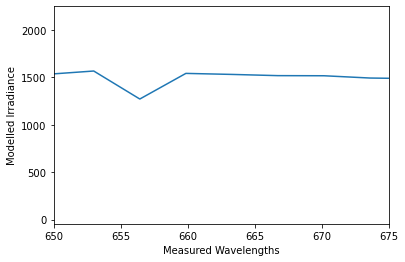

In [69]:
plt.plot(measured_wavelengths, hack_irr)
plt.xlabel('Measured Wavelengths')
plt.ylabel('Modelled Irradiance')
plt.xlim(650, 675)
#plt.ylim(1000, 1500)

In [59]:
d = {'0': hack_irr}
final_irradiance_df = pd.DataFrame(data = d)

In [60]:
final_irradiance_df.to_csv('final_irradiance_df.csv')